# Classificação de Pulsares usando modelos de Machine Learning

Este trabalho tem por objetivo a Análise da Base de dados HTRU sobre estrelas e pulsares, 
bem como a modelagem através de modelos de ML e comparação entre diferentes modelos.

# Importando Bibliotecas e a Base de Dados

In [1]:
#Importando bibliotecas principais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importando ferramentas de pré-processamento e métricas.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#importando modelos
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
#importando dataset e colocando os nomes da colunas
columns = ['Mean of the integrated profile','Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile','Skewness of the integrated profile','Mean of the DM-SNR curve','Standard deviation of the DM-SNR curve','Excess kurtosis of the DM-SNR curve','Skewness of the DM-SNR curve','Label']
data = pd.read_csv('HTRU_2.csv', names=columns)

# Pré-processamento

 Na fase do pré-processamento é feita a análise exploratória do modelo de forma que sejam apagadas inconsistências e valores ausentes nos dados, e que os melhores atributos sejam selecionados para serem usados para predição.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
Mean of the integrated profile                  17898 non-null float64
Standard deviation of the integrated profile    17898 non-null float64
Excess kurtosis of the integrated profile       17898 non-null float64
Skewness of the integrated profile              17898 non-null float64
Mean of the DM-SNR curve                        17898 non-null float64
Standard deviation of the DM-SNR curve          17898 non-null float64
Excess kurtosis of the DM-SNR curve             17898 non-null float64
Skewness of the DM-SNR curve                    17898 non-null float64
Label                                           17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [5]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Label
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Label
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


Text(0.5,1,'Verificando se existem valores faltantes')

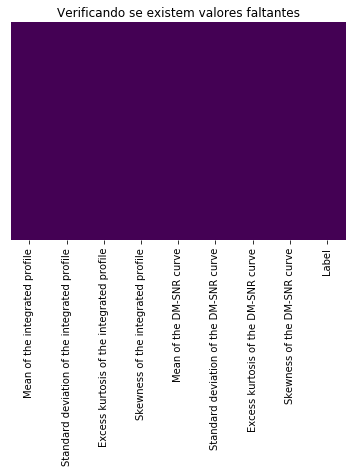

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Verificando se existem valores faltantes')

Text(0.5,1,'Distribuição de Classes')

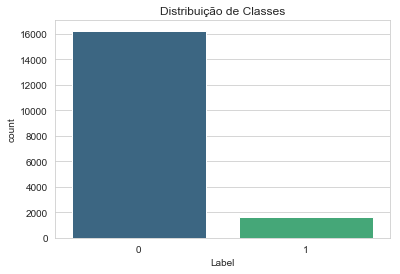

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Label',data=data,palette='viridis')
plt.title('Distribuição de Classes')

Text(0.5,1,'Matriz de correlação')

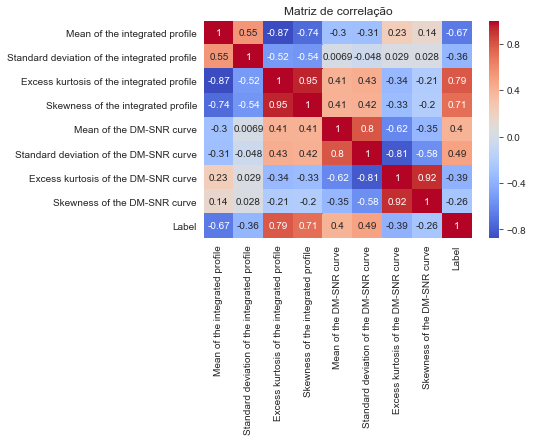

In [9]:
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')
plt.title('Matriz de correlação')
#Como a base tem 18 mil dados não é necessário excluir nenhum atributo

In [10]:
#instanciando o padronizador dos dados
scaler = StandardScaler()

In [11]:
scaler.fit(data.drop(data.columns[-1],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
#nova variável de atributos padronizados
scaled_features = scaler.transform(data.drop(data.columns[-1],axis=1))

In [13]:
#Divisão Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data[data.columns[-1]], test_size=0.30)

# K Nearest Neighbour (KNN)

In [14]:
#Escolhendo o melhor K
error_rate = []

# Vai consumir algum tempo
for i in range(1,42):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

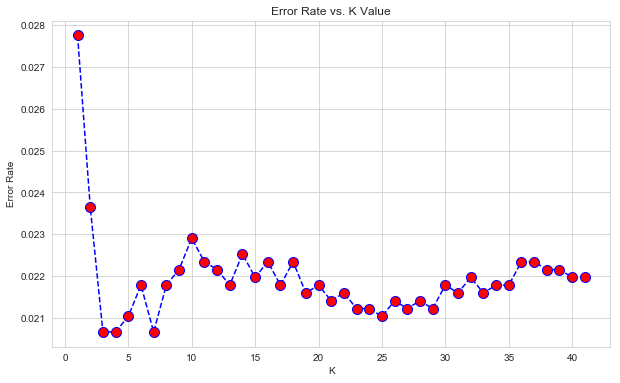

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,42),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [16]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

print('WITH K=7')
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
knn_score = accuracy_score(y_test,predictions)
print('Acurácia:', knn_score)

WITH K=7


[[4859   24]
 [  87  400]]


             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4883
          1       0.94      0.82      0.88       487

avg / total       0.98      0.98      0.98      5370



Acurácia: 0.9793296089385475


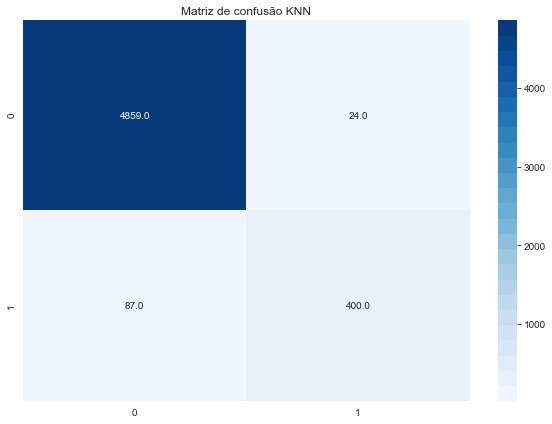

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='.1f', cmap=sns.color_palette("Blues", 25))
plt.title('Matriz de confusão KNN')
plt.show()

# Gaussian Naive Bayes (GNB)

In [18]:
gnb = GaussianNB()

In [19]:
gnb.fit(X_train,y_train)
predictions = gnb.predict(X_test)

In [20]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
gnb_score = accuracy_score(y_test,predictions)
print('Acurácia:', gnb_score)

[[4679  204]
 [  82  405]]


             precision    recall  f1-score   support

          0       0.98      0.96      0.97      4883
          1       0.67      0.83      0.74       487

avg / total       0.95      0.95      0.95      5370



Acurácia: 0.9467411545623836


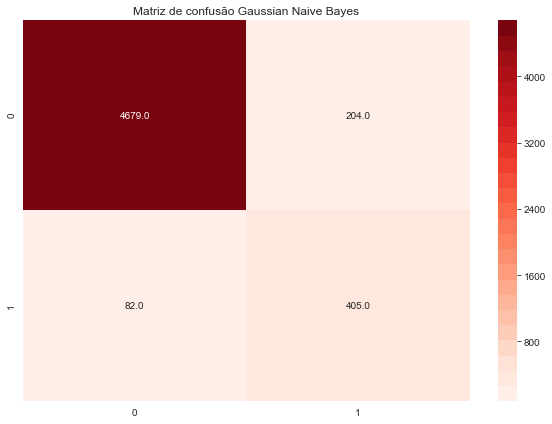

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='.1f', cmap=sns.color_palette("Reds", 25))
plt.title('Matriz de confusão Gaussian Naive Bayes')
plt.show()

# Redes Neurais Artificiais (RNA)

Rede com uma camada oculta

In [24]:
error_rate = []

# Vai demorar alguns minutos
for i in range(10,150,5):
    
    mlp = MLPClassifier(hidden_layer_sizes=(i, ), activation='logistic')
    mlp.fit(X_train,y_train)
    pred_i = mlp.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

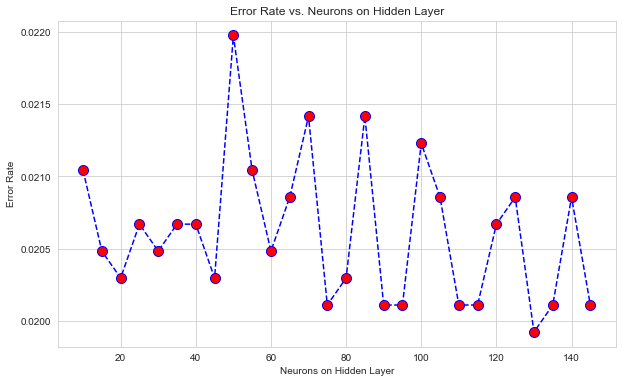

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(10,150,5),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Neurons on Hidden Layer')
plt.xlabel('Neurons on Hidden Layer')
plt.ylabel('Error Rate')

In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(75, ), activation='logistic')
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

In [27]:
print('WITH 75 Neurons on Hidden Layer')
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
mlp_score = accuracy_score(y_test,predictions)
print('Acurácia:', mlp_score)

WITH 75 Neurons on Hidden Layer


[[4858   25]
 [  83  404]]


             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4883
          1       0.94      0.83      0.88       487

avg / total       0.98      0.98      0.98      5370



Acurácia: 0.9798882681564246


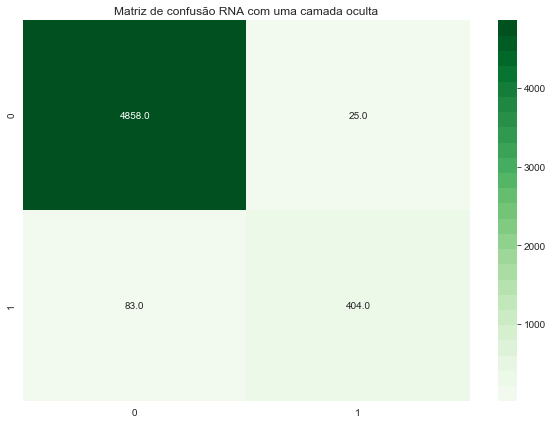

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='.1f', cmap=sns.color_palette("Greens", 25))
plt.title('Matriz de confusão RNA com uma camada oculta')
plt.show()

Verificando o ganho de desempenho com a adição de uma nova camada oculta

In [31]:
# Vai demorar alguns minutos
error_rate = []
for i in range(10,100,5):
    
    mlp = MLPClassifier(hidden_layer_sizes=(75,i, ), activation='logistic')
    mlp.fit(X_train,y_train)
    pred_i = mlp.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

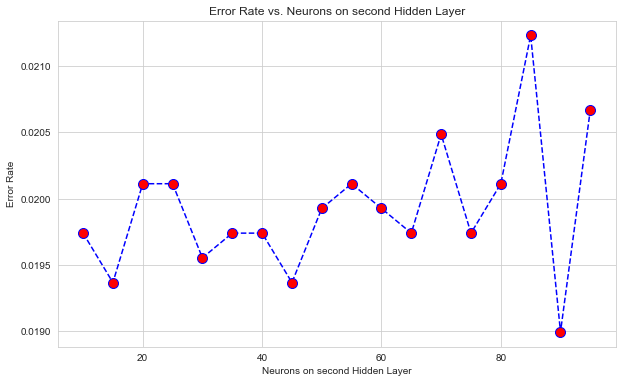

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(10,100,5),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Neurons on second Hidden Layer')
plt.xlabel('Neurons on second Hidden Layer')
plt.ylabel('Error Rate')

In [33]:
mlp = MLPClassifier(hidden_layer_sizes=(75, 45, ), activation='logistic')
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

In [34]:
print('WITH 75 Neurons on Second Hidden Layer')
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
second_mlp_score = accuracy_score(y_test,predictions)
print('Acurácia:', second_mlp_score)

WITH 75 Neurons on Second Hidden Layer


[[4860   23]
 [  84  403]]


             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4883
          1       0.95      0.83      0.88       487

avg / total       0.98      0.98      0.98      5370



Acurácia: 0.9800744878957169


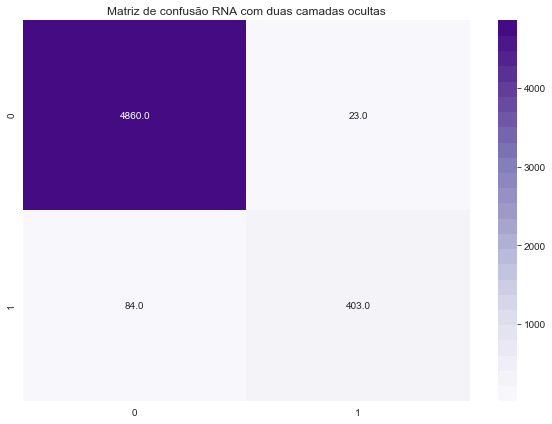

In [35]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='.1f', cmap=sns.color_palette("Purples", 25))
plt.title('Matriz de confusão RNA com duas camadas ocultas')
plt.show()